In [96]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix

In [10]:
# Data
df = pd.read_csv('~/Desktop/Data/train_users_2.csv')

In [11]:
# EDA
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [13]:
df.shape

(213451, 16)

In [21]:
df.rename(columns={'country_destination': 'dest'}, inplace=True)

In [42]:
df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
dest                               object
dtype: object

In [52]:
df['time_lag'] = df['date_account_created'] - df['timestamp_first_active']

In [54]:
df['time_lag'].mean()

Timedelta('-1 days +16:49:13.629563')

In [57]:
df['affiliate_provider'].value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [79]:
# thinking this is a good category to map into direct, google, other
df['affiliate_provider'].map({'direct': 1, 'google': 2, 'other': 3})

0         1.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
213446    2.0
213447    1.0
213448    1.0
213449    3.0
213450    1.0
Name: affiliate_provider, Length: 213451, dtype: float64

In [78]:
df

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dest,time_lag
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,465 days 19:27:05
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,731 days 06:11:51
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,475 days 00:47:13
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,764 days 17:58:31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,279 days 17:48:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,-1 days +00:03:24
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,-1 days +00:02:41
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,-1 days +00:02:06
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,-1 days +00:01:38


In [44]:
# too many unknowns to use
# could provide insights but probably not very useful during timed exercise
df['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [46]:
# Some people mistakenly put the birth year (1933, 1942, etc.)

df['age'].value_counts()

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
          ... 
1933.0       1
1942.0       1
112.0        1
1938.0       1
1952.0       1
Name: age, Length: 127, dtype: int64

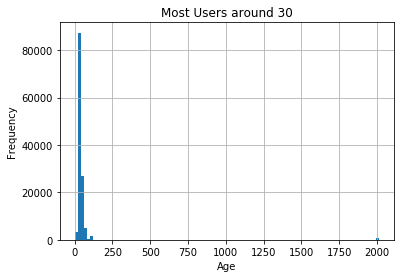

In [101]:
# confirms suspicion most users are around 30 years old
df['age'].hist(bins=100)
plt.title('Most Users around 30')
plt.xlabel('Age')
plt.ylabel('Frequency');

In [68]:
# Tells me most users interested in US, western Europe and 'NDF' (no destination found)
# (not all that useful for modeling)
df['dest'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: dest, dtype: int64

In [22]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
dest                            0
dtype: int64

In [32]:
df['dest'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: dest, dtype: int64

In [37]:
# Convert some of the date columns to date time columns
# from KD Nuggets https://www.kdnuggets.com/2016/03/doing-data-science-kaggle-walkthrough-cleaning-data.html/2
df['date_account_created'] = pd.to_datetime(df['date_account_created'], format='%Y-%m-%d')
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')
df['date_account_created'].fillna(df.timestamp_first_active, inplace=True)

df.drop('date_first_booking', axis=1, inplace=True)

In [38]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dest
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [41]:
df['age'].value_counts(ascending=True)

1952.0       1
1938.0       1
112.0        1
1942.0       1
1933.0       1
          ... 
32.0      5855
28.0      5939
29.0      5963
31.0      6016
30.0      6124
Name: age, Length: 127, dtype: int64

In [81]:
# Set up for model
subset = df[['gender', 'age', 'signup_method']].fillna(0)
X = pd.get_dummies(subset, columns=['gender', 'signup_method'], drop_first=True)

y = df['dest']


In [83]:
# establish baseline y
y.value_counts(normalize=True)

NDF      0.583473
US       0.292226
other    0.047290
FR       0.023532
IT       0.013282
GB       0.010888
ES       0.010536
CA       0.006690
DE       0.004971
NL       0.003570
AU       0.002525
PT       0.001017
Name: dest, dtype: float64

In [80]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dest,time_lag
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,465 days 19:27:05
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,731 days 06:11:51
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,475 days 00:47:13
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,764 days 17:58:31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,279 days 17:48:55


In [85]:
# Train test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [87]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

/Users/davidsutton/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# Score on training data
logreg.score(X_train, y_train)

0.5828731697566338

In [89]:
# Score on testing data
logreg.score(X_test, y_test)

0.5825384629799674

In [90]:
# Try a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()

In [92]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
# Score training data
rf.score(X_train, y_train)

0.6332704512518115

In [94]:
# Score testing data
rf.score(X_test, y_test)

0.6283754661469557

In [102]:
# Get predictions
pred = rf.predict(X_test)

In [103]:
cm = confusion_matrix(y_test, pred)

In [114]:
cm_df = pd.DataFrame(cm, index= sorted(list(set(y_train))), columns=sorted(list(set(y_train))))

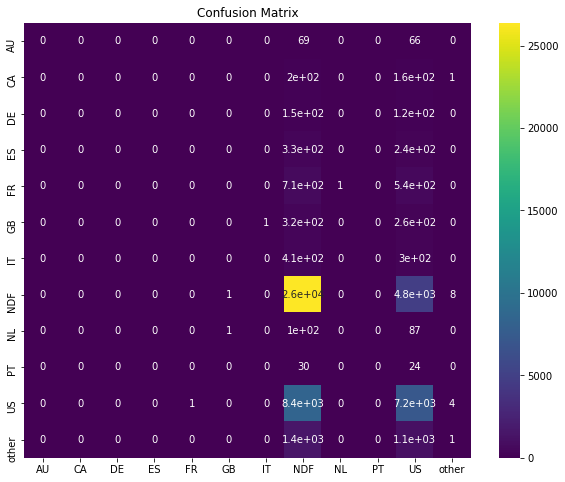

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, cmap='viridis', annot=True)
plt.title('Confusion Matrix');